<a href="https://colab.research.google.com/github/kemalyildirim/helloworld-machinelearning/blob/master/cse315_161805025_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kemal Yildirim - 161805025 Adnan Menderes University

CSE 315 Assignment#1


Import libraries.

In [0]:
import pandas as pd
import numpy as np
import urllib

Fetch data set then name columns.

In [0]:
column = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","CLASS"]
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/"

#Fetch training and test set
urllib.request.urlretrieve(link + "poker-hand-training-true.data","training.csv")
#urllib.request.urlretrieve(link + "poker-hand-testing.data","testing.csv")

training_set = pd.read_csv("training.csv", names = column)


In [224]:
print(training_set.head())

   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   1  10   1  11   1  13   1  12   1   1      9
1   2  11   2  13   2  10   2  12   2   1      9
2   3  12   3  11   3  13   3  10   3   1      9
3   4  10   4  11   4   1   4  13   4  12      9
4   4   1   4  13   4  12   4  11   4  10      9
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   1   1   1  13   2   4   2   3   1  12      0
1   3  12   3   2   3  11   4   5   2   5      1
2   1   9   4   6   1   4   3   2   3   9      1
3   1   4   3  13   2  13   2   1   3   6      1
4   3  10   2   7   1   2   2  11   4   9      0


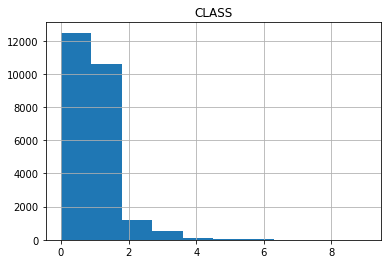

In [243]:
hist = training_set.hist(column='CLASS')

Set rows [0:9] as features and row 11 as output:

In [0]:
from sklearn.model_selection import train_test_split

X = training_set.iloc[:,0:-1]
Y = training_set.iloc[:,-1]

#Split 20% of the data for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [226]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20008, 10)
(20008,)
(5002, 10)
(5002,)


In [227]:
print(X_train.head())
print(Y_train.head())

       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5
18828   2   2   1   2   3   8   3   9   4   6
5096    4  12   3   7   2  10   3   9   1   6
4013    4   3   1   2   4   7   3   9   4   2
16254   3   1   2  10   1  11   2   5   3  12
695     2   3   4   7   1   6   2   2   2   6
18828    1
5096     0
4013     1
16254    0
695      1
Name: CLASS, dtype: int64


In [228]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

k_range = list(range(1,20))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()

#5-Fold Cross Validation for KNN
grid = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy')
grid.fit(X_train, Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#KNN

prediction_knn = grid.predict(X_test)
accuracy_knn = accuracy_score(Y_test, prediction_knn)
print(accuracy_knn)
print(classification_report(Y_test, prediction_knn))
print(confusion_matrix(Y_test, prediction_knn))

0.5799680127948821
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      2552
           1       0.53      0.46      0.49      2075
           2       0.50      0.01      0.02       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

   micro avg       0.58      0.58      0.58      5002
   macro avg       0.20      0.15      0.15      5002
weighted avg       0.55      0.58      0.55      5002

[[1943  608    1    0    0    0    0    0]
 [1118  956    1    0    0    0    0    0]
 [ 101  127    2    0    0    0    0    0]
 [  17   84    0    0    0    0    0    0]
 [   0   22    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0]
 [   3    9    0    0    0    0    0    0]
 [   0    1    0    0    0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [233]:
#KNN without GridSearch
knn.fit(X_train, Y_train)
prediction_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, prediction_knn)
print(accuracy_knn)
print(classification_report(Y_test, prediction_knn))
print(confusion_matrix(Y_test, prediction_knn))


0.5559776089564175
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      2552
           1       0.50      0.48      0.49      2075
           2       0.29      0.03      0.06       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

   micro avg       0.56      0.56      0.56      5002
   macro avg       0.17      0.15      0.15      5002
weighted avg       0.53      0.56      0.53      5002

[[1778  772    1    1    0    0    0    0]
 [1056  995   17    7    0    0    0    0]
 [ 101  118    8    3    0    0    0    0]
 [  25   75    1    0    0    0    0    0]
 [   3   18    1    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0]
 [   4    7    0    1    0    0    0    0]
 [   0    1    0    0    0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [238]:
#Decision Tree

tree.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [239]:
#Decision Tree

prediction_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(Y_test, prediction_tree)
print(accuracy_tree)
print(classification_report(Y_test,prediction_tree))
print(confusion_matrix(Y_test, prediction_tree))



0.4892043182726909
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      2552
           1       0.46      0.47      0.46      2075
           2       0.10      0.12      0.11       230
           3       0.07      0.09      0.08       101
           4       0.04      0.05      0.04        22
           5       0.25      0.44      0.32         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.49      0.49      0.49      5002
   macro avg       0.15      0.17      0.16      5002
weighted avg       0.50      0.49      0.49      5002

[[1432  965   85   41   13   10    4    1    0    1]
 [ 863  973  153   66    9    2    5    2    2    0]
 [  68  116   28   14    3    0    1    0    0    0]
 [  32   53    6    9    1    0    0    0    0    0]
 [   7   1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
